 Tutaj zaimportuj wymagane biblioteki

In [2]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [3]:
username = 'postgres'
password = 'password'

host = 'localhost'
database = 'airlines'
port = 5432

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [4]:
url_object = URL.create(
    "postgresql+psycopg2",
    username="postgres",
    password="password",  
    host="localhost",
    database="airlines",
)

engine = create_engine(url_object)
connection = engine.connect()

 Tutaj uzupełnij implementację metody `read_sql_table`

In [5]:
flight_df_raw = pd.read_sql_table('flight', connection)


 Tutaj wczytaj ramkę do obszaru roboczego

In [6]:
flight_df_raw.columns
flight_df_raw.head(10)

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019
5,6,1,20,7,WN,N298WN,2359,10397,11697,2000,...,115.0,97.0,581.0,3,0.0,0.0,0.0,0.0,28.0,2019
6,7,1,20,7,WN,N785SW,4234,10397,11697,1815,...,115.0,121.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019
7,8,1,20,7,WN,N7874B,4477,10397,11697,1400,...,110.0,110.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019
8,9,1,20,7,WN,N736SA,5205,10397,11697,655,...,110.0,116.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019
9,10,1,20,7,WN,N8557Q,2949,10397,12892,1250,...,315.0,303.0,1947.0,8,NaN,NaN,NaN,NaN,NaN,2019


 Tutaj oczyść ramkę usuwając loty z roku 2020 oraz te anulowane

In [7]:
# Usuń loty, które odbyły się w 2020 roku i zostały anulowane
flight_df = flight_df_raw[(flight_df_raw['year'] != 2020) & (flight_df_raw['cancelled'] != 1)]

 Tutaj zmień nazwę kolumny `dep_delay_new` na `dep_delay`

In [8]:
flight_df = flight_df.rename(columns={'dep_delay_new': 'dep_delay'})

 Tutaj zainicjuj zmienne `flight_df_columns_amount` oraz `flight_df_rows_amount`, które zostaną użyte do sprawdzenia poprawności wykonania tej części

In [9]:
flight_df_columns_amount = len(flight_df.columns)
flight_df_rows_amount = len(flight_df)

 Tutaj wyznacz statystyki opisowe dla kolumny `dep_delay` oraz zainicjuj ramkę `dep_delay_statistics_df`.

In [15]:
dep_delay_statistics_df = flight_df['dep_delay'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).round(2)
print(dep_delay_statistics_df.to_dict())

{'count': 1095742.0, 'mean': 14.77, 'std': 46.49, 'min': 0.0, '10%': 0.0, '25%': 0.0, '50%': 0.0, '75%': 8.0, '90%': 42.0, '95%': 81.0, '99%': 206.0, 'max': 1959.0}


In [17]:
import matplotlib.pyplot as plt

 Tutaj stwórz wykres dla całej kolumny `dep_delay`

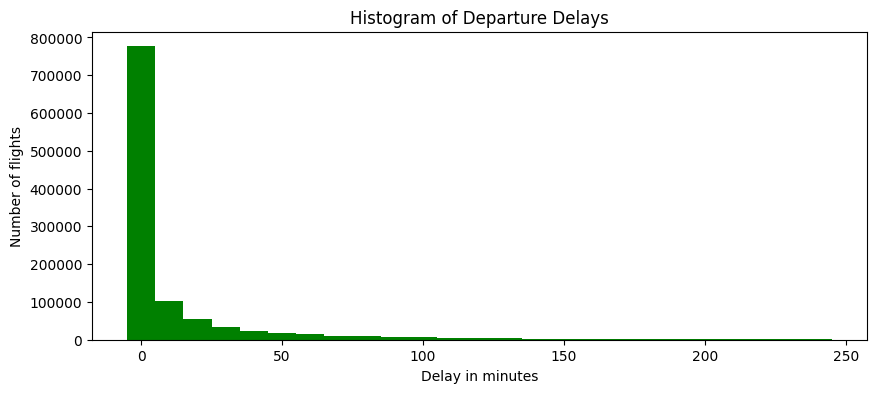

In [18]:
plt.figure(figsize=(10,4))
x = plt.hist(flight_df['dep_delay'],bins=range(-5, 250, 10), color='green' )
plt.ylabel('Number of flights')
plt.xlabel('Delay in minutes')
plt.title('Histogram of Departure Delays')
plt.show()


 Tutaj stwórz wykres dla `dep_delay` używając warunku `dep_delay > 0`

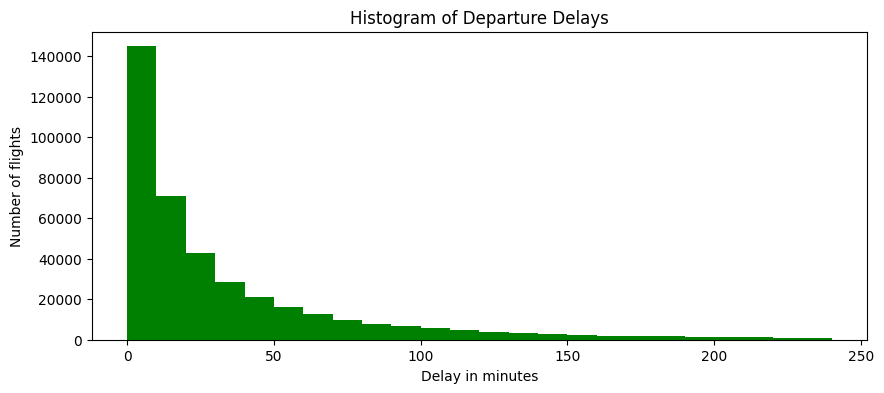

In [19]:
# Wyodrębnij wiersze z wartością dep_delay > 0
flight_df_dep_delay = flight_df[flight_df['dep_delay'] > 0]
plt.figure(figsize=(10,4))
x = plt.hist(flight_df_dep_delay['dep_delay'],bins=range(0, 250, 10), color='green' )
plt.ylabel('Number of flights')
plt.xlabel('Delay in minutes')
plt.title('Histogram of Departure Delays')
plt.show()


 Tutaj stwórz wykres dla `dep_delay` używając warunków `dep_delay > 0` oraz `dep_delay < percentile 95%`

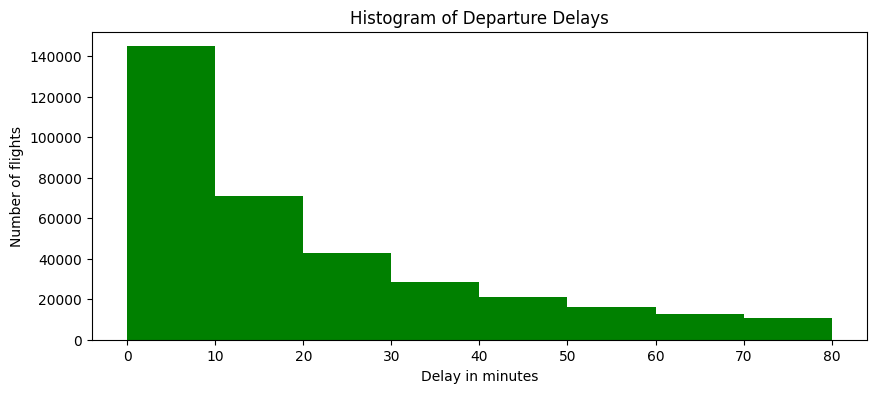

In [20]:
filtered_dep_delay = flight_df.loc[(flight_df['dep_delay'] > 0) & 
                                   (flight_df['dep_delay'] < flight_df['dep_delay'].quantile(0.95)), 
                                   'dep_delay']

plt.figure(figsize=(10,4))
x = plt.hist(filtered_dep_delay, bins=range(0, int(filtered_dep_delay.max()) + 10, 10), color='green' )

plt.ylabel('Number of flights')
plt.xlabel('Delay in minutes')
plt.title('Histogram of Departure Delays')
plt.show()



 Tutaj stwórz nową kolumnę `is_delayed` oraz odpowiednio ją uzupełnij

In [21]:
flight_df['is_delayed'] = flight_df['dep_delay'] > 15


 Tutaj zdefiniuj oraz wyznacz wartość dla zmiennej `delayed_ratio`

In [22]:
delayed_ratio = round(((len(flight_df[flight_df['dep_delay'] > 15]) / len(flight_df)) * 100) /100, 2)
print(delayed_ratio)

0.19


 Tutaj pogrupuj dane, a wyniki zapisz do ramki `flight_delays_by_month_df`

In [24]:

flight_delays_by_month_df = flight_df.groupby(flight_df['month'])['is_delayed'].mean().reset_index()

flight_delays_by_month_df


,month,is_delayed
0,1,0.180787
1,2,0.218565
2,3,0.176056
3,4,0.182794
4,5,0.204687
5,6,0.247622
6,7,0.216690
7,8,0.210322
8,9,0.147661
9,10,0.163460


 Tutaj narysuj wykres, używając danych z ramki `flight_delays_by_month_df`

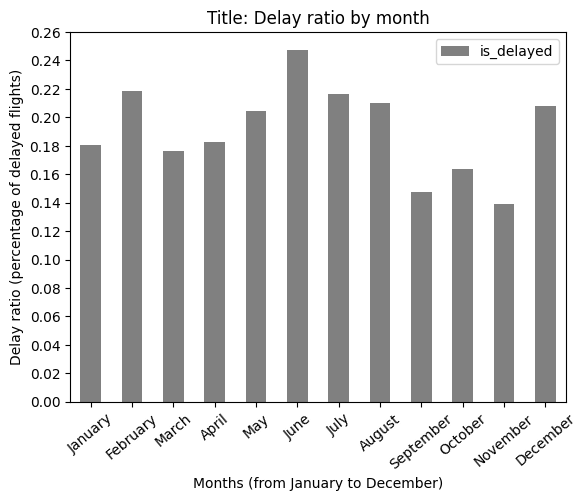

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

flight_delays_by_month_df.plot(x='month', y='is_delayed', kind='bar', color='grey')
plt.title('Title: Delay ratio by month')
plt.xlabel('Months (from January to December)')
plt.ylabel('Delay ratio (percentage of delayed flights)')
plt.xticks(range(0,12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))

plt.show()


 Tutaj pogrupuj dane

In [117]:
flight_delays_by_weekday_df = flight_df.groupby('day_of_week')['is_delayed'].mean().reset_index()
flight_delays_by_weekday_df

,day_of_week,is_delayed
0,1,0.201266
1,2,0.174751
2,3,0.182782
3,4,0.212168
4,5,0.203227
5,6,0.167831
6,7,0.192409


 Tutaj narysuj wykres

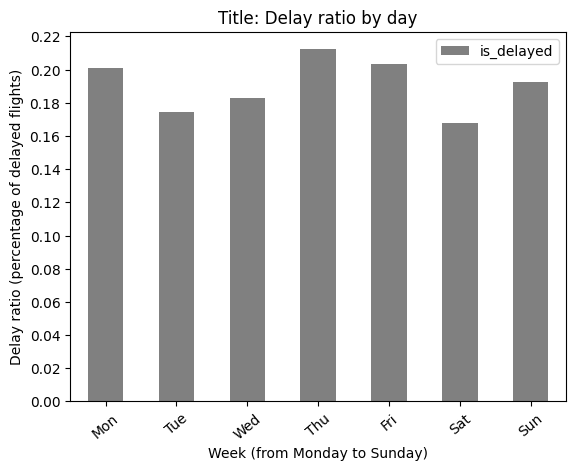

In [132]:
import matplotlib.pyplot as plt


flight_delays_by_weekday_df.plot(x='day_of_week', y='is_delayed', kind='bar', color='grey')
plt.title('Title: Delay ratio by day')
plt.xlabel('Week (from Monday to Sunday)')
plt.ylabel('Delay ratio (percentage of delayed flights)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=40)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
plt.show()

 Tutaj dodaj nową kolumnę `is_weekend` do `flight_df`

In [146]:
flight_df['is_weekend'] = flight_df['day_of_week'].apply(lambda x: x in [6,7])

 Tutaj dokonaj agregacji danych do ramki `flight_delays_by_weekend_df`

In [163]:

flight_delays_by_weekend_df = flight_df.groupby('is_weekend')['is_delayed'].mean().reset_index()
flight_delays_by_weekend_df['is_delayed'] = round(flight_delays_by_weekend_df['is_delayed'], 2)
#flight_delays_by_weekend_df = flight_df.groupby('is_weekend')['is_delayed'].mean().round(2).index()

flight_delays_by_weekend_df.to_dict()
# print(flight_delays_by_weekend_df)

{'is_weekend': {0: False, 1: True}, 'is_delayed': {0: 0.19, 1: 0.18}}

 Tutaj narysuj wykres używając danych z ramki `flight_delays_by_weekend_df`

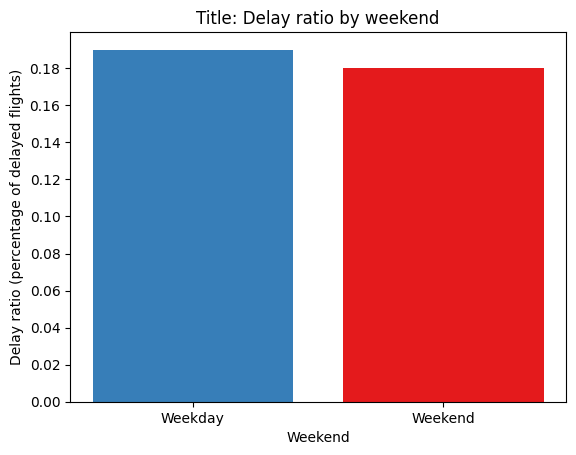

In [164]:
import matplotlib.pyplot as plt

plt.bar(['Weekday', 'Weekend'], flight_delays_by_weekend_df['is_delayed'], color=['#377eb8', '#e41a1c'])
plt.title('Title: Delay ratio by weekend')
plt.xlabel('Weekend')
plt.ylabel('Delay ratio (percentage of delayed flights)')

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))

plt.show()



 Tutaj dokonaj agregacji danych do ramki `flight_distance_analysis_df`

In [166]:
flight_distance_analysis_df = flight_df['distance'].describe(
    percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).round(2)
print(flight_distance_analysis_df)


count    1095742.00
mean         758.08
std          600.43
min          100.00
10%          216.00
25%          337.00
50%          606.00
75%          937.00
90%         1721.00
95%         2475.00
99%         2586.00
max         2586.00
Name: distance, dtype: float64


 Tutaj narysuj wykres dla 10 000 losowych wierszy z tabeli `flight_df`

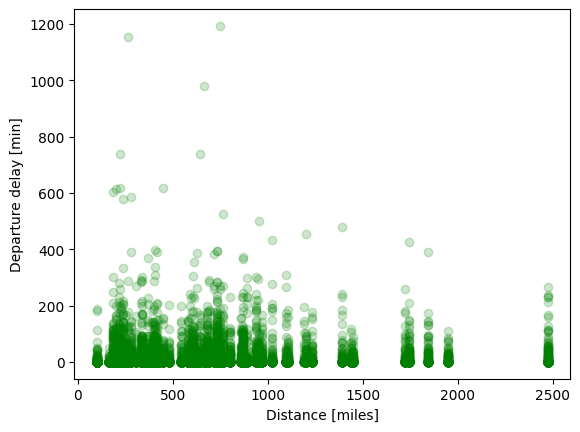

In [184]:
import random
import matplotlib.pyplot as plt

sample = flight_df.sample(10000, random_state=42)
plt.scatter(sample['distance'], sample['dep_delay'], alpha=0.2, color='green')

plt.xlabel('Distance [miles]')
plt.ylabel('Departure delay [min]')
plt.show()



 Tutaj usuń z ramki `flight_df` wiersze, dla których `distance` jest powyżej `95% percentyla` (> 95%)

In [168]:
distance_95_percentile = flight_df['distance'].quantile(0.95)
flight_df = flight_df[flight_df['distance'] <= distance_95_percentile]


### Sprawdzenie

In [169]:
flight_df_expected_rows_amount = 1057391
flight_df_rows_amount = flight_df.shape[0]

assert flight_df_rows_amount == flight_df_expected_rows_amount, f'Oczekiwano {flight_df_expected_rows_amount} wierszy, otrzymano {flight_df_rows_amount}'

 Tutaj dokonaj agregacji zmiennej `distance` oraz wyznacz odsetek opóźnień

In [170]:
flight_df['distance_agg'] = (flight_df['distance'] // 100) * 100
flight_delays_by_distance_agg_df = flight_df.groupby('distance_agg')['is_delayed'].mean().reset_index()
flight_delays_by_distance_agg_df['is_delayed'] = round(flight_delays_by_distance_agg_df['is_delayed'], 2)
print(flight_delays_by_distance_agg_df)


    distance_agg  is_delayed
0          100.0        0.12
1          200.0        0.19
2          300.0        0.20
3          400.0        0.17
4          500.0        0.17
5          600.0        0.20
6          700.0        0.24
7          800.0        0.21
8          900.0        0.22
9         1000.0        0.20
10        1100.0        0.19
11        1200.0        0.21
12        1300.0        0.25
13        1400.0        0.16
14        1700.0        0.21
15        1800.0        0.27
16        1900.0        0.20
17        2400.0        0.17


 Tutaj narysuj wykres słupkowy używając danych zapisanych w `flight_delays_by_distance_agg_df`

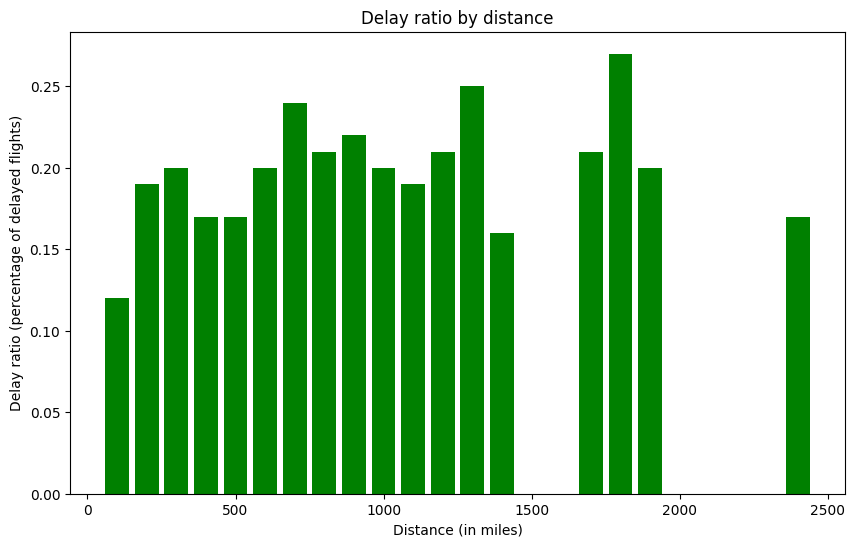

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(flight_delays_by_distance_agg_df['distance_agg'], flight_delays_by_distance_agg_df['is_delayed'], width=80, color='green')
plt.title('Delay ratio by distance')
plt.xlabel('Distance (in miles)')
plt.ylabel('Delay ratio (percentage of delayed flights)')


plt.show()


Tutaj wyznacz odcinki, dla których zostały wyznaczone poszczególne grupy

In [185]:
flight_distance_by_distance_group = flight_df.groupby('distance_group')['distance'].agg(['min', 'max'])
print(flight_distance_by_distance_group)

                   min     max
distance_group                
1                100.0   239.0
2                255.0   480.0
3                544.0   746.0
4                762.0   967.0
5               1024.0  1235.0
6               1389.0  1448.0
7               1721.0  1744.0
8               1846.0  1947.0
10              2475.0  2475.0


 Tutaj wyznacz odsetek opóźnień w każdej grupie zapisując wyniki do ramki `flight_delays_by_distance_group_df`

In [186]:
flight_delays_by_distance_group_df = flight_df.groupby('distance_group')['is_delayed'].mean().reset_index()
flight_delays_by_distance_group_df['is_delayed'] = round(flight_delays_by_distance_group_df['is_delayed'], 2)


 Tutaj narysuj wykres przy użyciu ramki `flight_delays_by_distance_group_df`

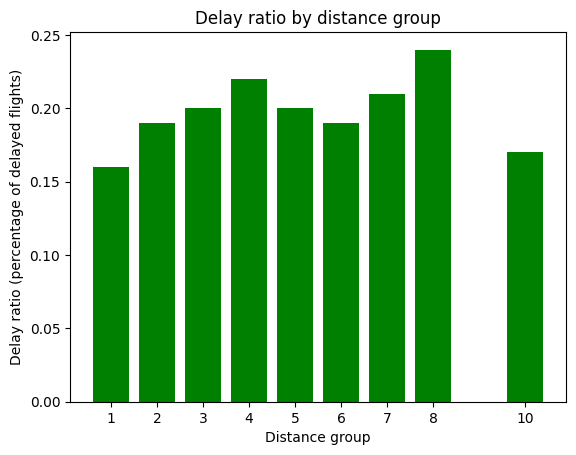

In [188]:
import matplotlib.pyplot as plt

plt.bar(flight_delays_by_distance_group_df['distance_group'], flight_delays_by_distance_group_df['is_delayed'], color='green')
plt.title('Delay ratio by distance group')
plt.xlabel('Distance group')
plt.ylabel('Delay ratio (percentage of delayed flights)')
plt.xticks(flight_delays_by_distance_group_df['distance_group'])
plt.show()
